In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("../datasets/Loan_Default.csv")

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.shape

(148670, 34)

In [5]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [7]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [8]:
possible_targets = [col for col in df.columns 
                    if 'default' in col.lower() 
                    or 'target' in col.lower() 
                    or 'status' in col.lower()
                    or 'dlq' in col.lower()]

possible_targets

['Status']

In [9]:
target_col = possible_targets[0]
target_col

'Status'

In [10]:
df[target_col].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

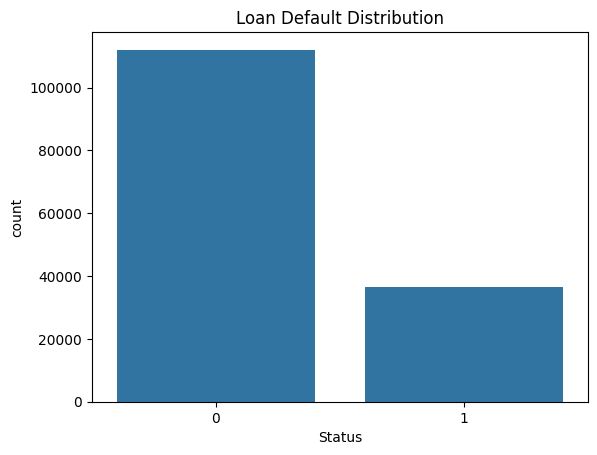

In [11]:
sns.countplot(x=target_col, data=df)
plt.title("Loan Default Distribution")
plt.show()

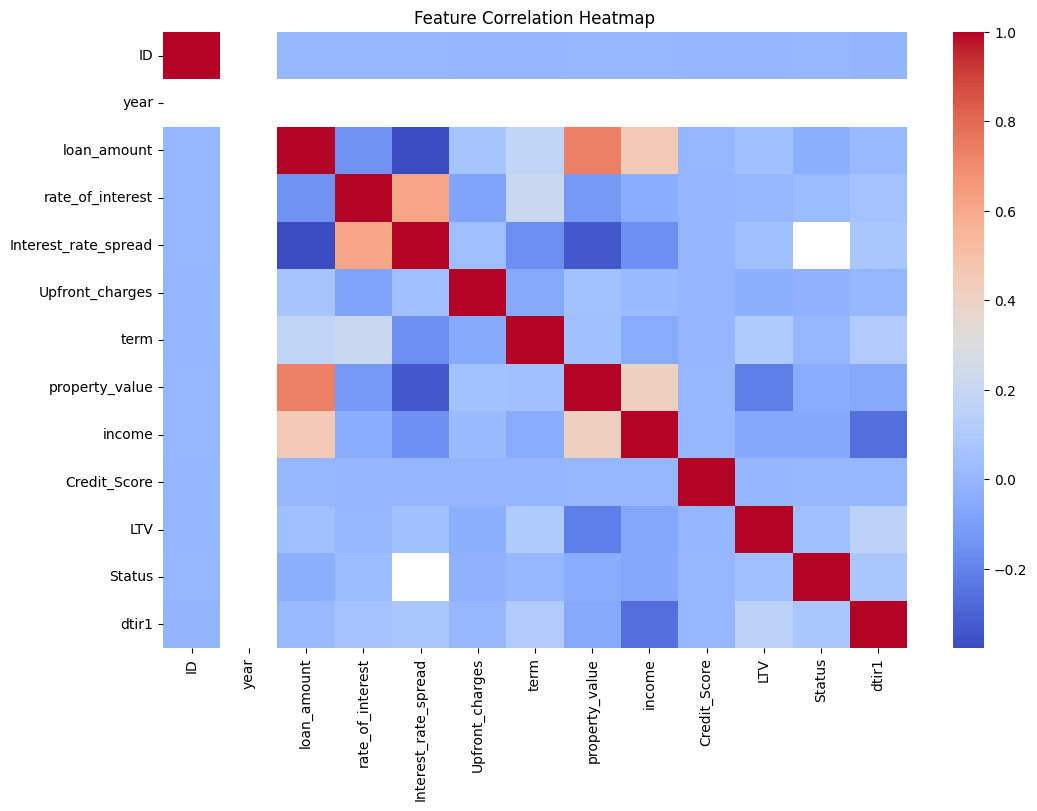

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread',
       'Upfront_charges', 'term', 'property_value', 'income', 'Credit_Score',
       'LTV', 'Status', 'dtir1'],
      dtype='object')

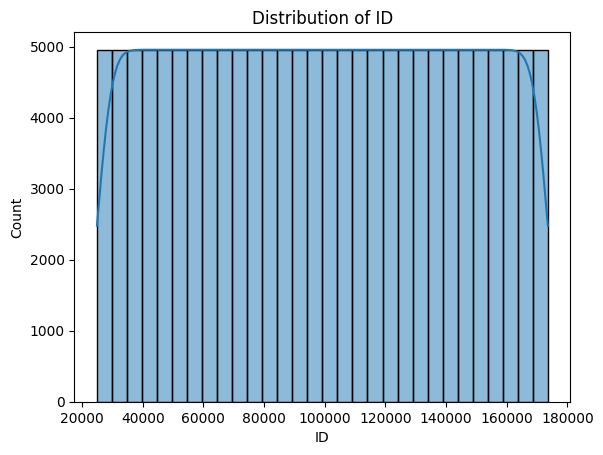

In [14]:
sns.histplot(df[numeric_cols[0]], bins=30, kde=True)
plt.title(f"Distribution of {numeric_cols[0]}")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [16]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [17]:
target_col = "Status"
print("Target column selected:", target_col)

Target column selected: Status


In [18]:
df[target_col].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [20]:
X = df.drop(columns=[target_col]).copy()
y = df[target_col].copy()

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (148670, 33)
y shape: (148670,)


In [21]:
X = pd.get_dummies(X, drop_first=True)
print("X shape after encoding:", X.shape)

X shape after encoding: (148670, 50)


In [22]:
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)

print("Remaining NaN values in X:", X.isna().sum().sum())

Remaining NaN values in X: 0


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (118936, 50) (118936,)
Testing set: (29734, 50) (29734,)


In [24]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully (balanced)")


Logistic Regression model trained successfully (balanced)


C:\Users\karth\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

print("📊 Baseline Logistic Regression Results")
print("--------------------------------------")
print("Accuracy:", round(accuracy * 100, 2), "%")
print("ROC-AUC Score:", round(roc_auc, 3))
print("Confusion Matrix:\n", conf_matrix)


📊 Baseline Logistic Regression Results
--------------------------------------
Accuracy: 57.92 %
ROC-AUC Score: 0.596
Confusion Matrix:
 [[11694 10712]
 [ 1800  5528]]


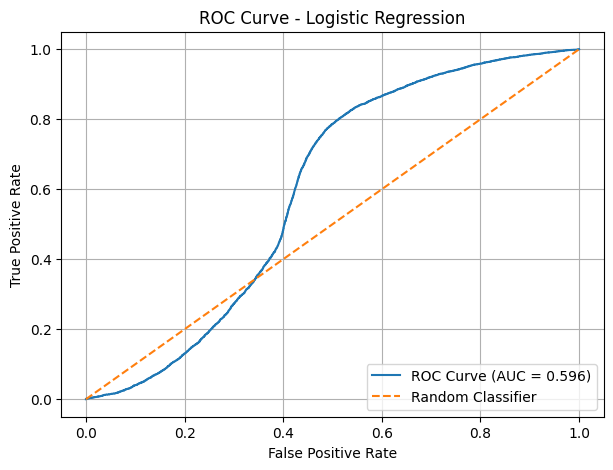

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_value = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_value:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [27]:
pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

In [30]:
# Calculate imbalance ratio
neg, pos = y_train.value_counts().sort_index()
scale_pos_weight = neg / pos

print("Negative samples:", neg)
print("Positive samples:", pos)
print("scale_pos_weight:", scale_pos_weight)


Negative samples: 89625
Positive samples: 29311
scale_pos_weight: 3.0577257684828223


In [32]:
# Clean column names for XGBoost: remove/replace [, ], <

def clean_col_name(col):
    col = str(col)
    col = col.replace("[", "(").replace("]", ")")
    col = col.replace("<", "lt_")
    return col

X_train_xgb = X_train.copy()
X_test_xgb = X_test.copy()

X_train_xgb.columns = [clean_col_name(c) for c in X_train_xgb.columns]
X_test_xgb.columns = [clean_col_name(c) for c in X_test_xgb.columns]

print("Example original col name:", X_train.columns[0])
print("Example cleaned  col name:", X_train_xgb.columns[0])


Example original col name: ID
Example cleaned  col name: ID


In [33]:
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,   # ✅ handles imbalance
    eval_metric='auc',
    random_state=42
)

xgb_model.fit(X_train_xgb, y_train)

print("✅ XGBoost model trained successfully")


✅ XGBoost model trained successfully


In [35]:
y_prob_xgb = xgb_model.predict_proba(X_test_xgb)[:, 1]

# start with default threshold 0.5
y_pred_xgb = (y_prob_xgb >= 0.5).astype(int)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print("📊 XGBoost Results (Threshold = 0.5)")
print("-----------------------------------")
print("Accuracy:", round(accuracy_xgb * 100, 2), "%")
print("ROC-AUC Score:", round(roc_auc_xgb, 3))
print("Confusion Matrix:\n", conf_matrix_xgb)

📊 XGBoost Results (Threshold = 0.5)
-----------------------------------
Accuracy: 99.99 %
ROC-AUC Score: 1.0
Confusion Matrix:
 [[22402     4]
 [    0  7328]]


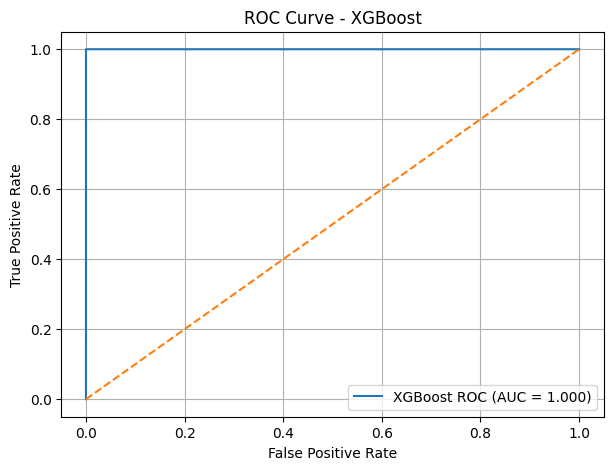

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"XGBoost ROC (AUC = {roc_auc_value:.3f})")
plt.plot([0,1], [0,1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [37]:
import pandas as pd

feature_importance = pd.Series(
    xgb_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

feature_importance.head(10)


Interest_rate_spread                 0.953634
Upfront_charges                      0.031343
credit_type_EQUI                     0.003211
rate_of_interest                     0.003110
Gender_Sex Not Available             0.002388
submission_of_application_to_inst    0.000970
Neg_ammortization_not_neg            0.000940
Credit_Worthiness_l2                 0.000698
loan_limit_ncf                       0.000663
loan_type_type3                      0.000460
dtype: float32